In [109]:
import sympy as sp
import numpy as np
import math
from matplotlib import pyplot as plt
import sys
sys.setrecursionlimit(2000)

In [12]:
def f(x):
  return x**5 + 2*x**3 - x - 1
  #polynomial we're finding roots for

In [13]:
def approxf(e):
  assert e > 0, "e must be positive"
  a = 0
  #lower bound
  b = 1
  #upper bound
  while abs(f(b) - f(a)) >= e:
    c = (a + b) / 2
    #c is the midpoint of a and b
    if f(c) == 0:
      return c
      #if c is a root, we're done
    elif f(c) > 0:
      b = c
      #if f(c) is positive, replace b with c
    elif f(c) < 0:
      a = c
      #if f(c) is negative, replace a with c
  c = int(c/e) * e
  return c
  #when the difference of f(a) and f(b) is within our error, we're done

In [14]:
approxf(0.000001)
#root of f(x) accurate to 6 decimals

0.878388

In [15]:
#Every odd degree polynomial has a real root because imaginary roots come in pairs

In [95]:
def Solver(coef_list):
  assert len(coef_list) % 2 == 0, "must insert an even number of coefficients."
  n = coef_list[len(coef_list) - 1]
  assert n != 0, "the last term cannot be 0"
  M = 0
  m = 0
  for i in range(len(coef_list)):
    if 0 < abs(coef_list[i]) < 1:
      M += abs(1.0 / coef_list[i])
      m -= abs(1.0 / coef_list[i])
    if abs(coef_list[i]) >= 1:
      M += abs(coef_list[i])
      m -= abs(coef_list[i]) 
  b = M
  a = m
  poly = lambda x : sum(coef_list[i]*x**i for i in range(len(coef_list)))
  Evala = poly(a)
  Evalb = poly(b)
  if ((Evala > 0 and Evalb > 0) or (Evala < 0 and Evalb < 0)):
    while ((Evala > 0 and Evalb > 0) or (Evala < 0 and Evalb < 0)):
      a *= 2
      b *= 2
      Evala = poly(a)
      Evalb = poly(b)
  Evaldiff = abs(Evalb - Evala)
  while (Evaldiff > 0.000000000001):
    c = (b + a) / 2
    Evalc = poly(c)
    if (Evalc == 0):
      return c
    elif (Evalc > 0):
      b = c
    elif (Evalc < 0):
      a = c
    Evala = poly(a)
    Evalb = poly(b)
    Evaldiff = abs(Evalb - Evala)
  return c

In [96]:
#Part A
print(Solver([4, -4, 3, -3, -1, 1]))
#Part B
print(Solver([0, -8000, 800040, 4003.8, -19.981, 0.1]))
#Part C
print(Solver([-2519.48, -251915, -12594100, 165746, -714.13, 1]))
#Part D
print(Solver([-0.1, -1, 1000, 10000, 0.1, 1]))
print(Solver([-97.9470899470899, -57.1481481481481, 8.82539682539682, 1.00000000000000]))

-2.0
0.0
314.1432379062469
0.009999999950003578
5.333333333333331


In [110]:
def newtonf(n):
  x, y = sp.symbols('x, y')
  expr = x**5 + 2*x**3 - x - 1
  dxexpr = sp.diff(expr, x) #derivative of the polynomial
  m = dxexpr.evalf(subs={x:n}) #slope
  tang = ((y - expr.evalf(subs={x:n})) / m) + n #tangent line in terms of y
  N = tang.evalf(subs={y:0}) #x-intercept
  if abs(expr.evalf(subs={x:N})) < 0.000001:
    return N #If within error, return x_new
  else:
    return newtonf(N) #Else, recurse

In [ ]:
newtonf(0)

0.878388641657747

In [115]:
def Newton(n, f):
  x,y = sp.symbols('x,y')
  df = sp.diff(f, x)
  m = df.evalf(subs={x:n})
  y0 = f.evalf(subs={x:n})
  tang = ((y - y0) / m) + n
  N = tang.evalf(subs={y:0})
  if abs(f.evalf(subs={x:n}) - f.evalf(subs={x:N})) < 0.000001:
    return N
  else:
    return Newton(N, f)

In [116]:
x = sp.symbols('x')
f = x**5 + 2*x**3 - x - 1
Newton(1, f)

0.878388641348340

In [119]:
f = x**9 + 16.8277777777778*x**8 - 102.576111111111*x**7 - 1705.15369753086*x**6 + 3917.38375*x**5 + 54023.9802191358*x**4 - 70364.7293333334*x**3 - 648403.845049383*x**2 + 459858.121777778*x + 2496779.12
Newton(-92, f)

-16.7500000000000

In [117]:
x = sp.symbols('x')
f = sp.sin(x**2) + x**2 - x - 1
Newton(0, f)

-0.500873933398175

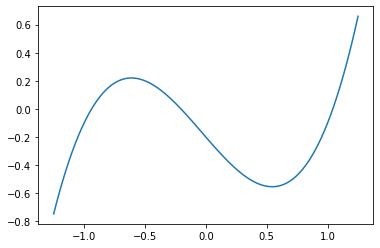

-0.938475307901644
-0.204358239027370
1.04283354692901


In [118]:
x = sp.symbols('x')
f = x**3 + 0.1*x**2 - x - 0.2
X = np.linspace(-1.25, 1.25, 100)
Y = []
for i in range(len(X)):
  Y += [f.evalf(subs={x:X[i]})]
Y = np.array(Y)
plt.plot(X,Y)
plt.show()
#f has 3 roots
print(Newton(-1, f))
print(Newton(0, f))
print(Newton(1, f))
#All solutions can be found
df = sp.diff(f, x)
null1 = Newton(-1, df)
null2 = Newton(1, df)
#null1 and null2 will not work